# Curso da alura - Data Science: Primeiros passos

## Data Science: Dados e visualizações

# Analisando as notas em geral

In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv('./dataset/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = ['usuarioID', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioID,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [7]:
print(notas['nota'].mean())
print(notas.nota.median())

3.501556983616962
3.5


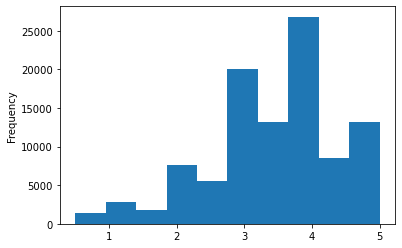

In [8]:
_ = notas.nota.plot(kind='hist')

In [9]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

C:\Users\guilh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


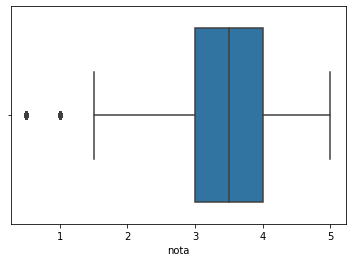

In [10]:
import seaborn as sns

_ = sns.boxplot(notas.nota)

# Olhando os filmes

In [11]:
filmes = pd.read_csv('dataset/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
notas.head()

,usuarioID,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
filmes.columns = ['filmeId', 'titulo', 'genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando algumas notas especificas por filme

In [14]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [15]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [16]:
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

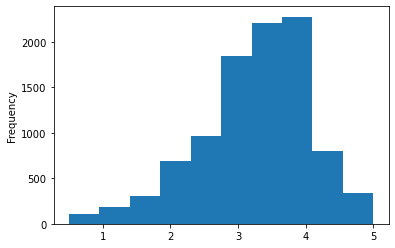

In [17]:
medias_por_filme.plot(kind='hist')

<AxesSubplot:ylabel='nota'>

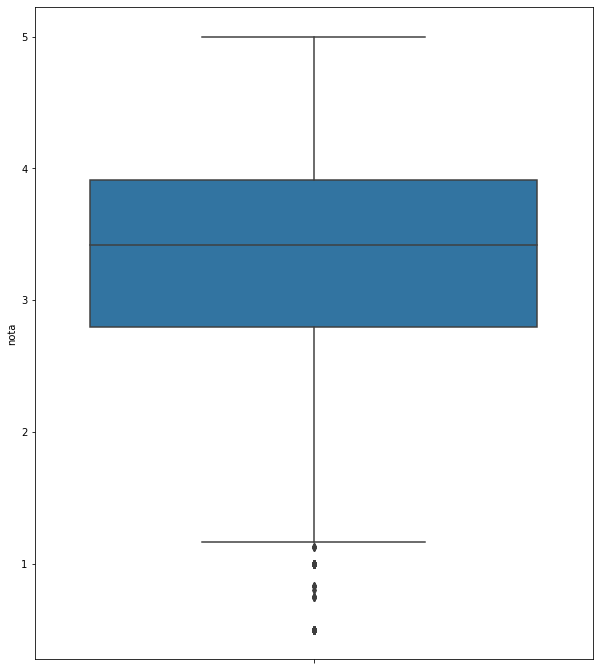

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,12))
sns.boxplot(y = medias_por_filme)

In [19]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

C:\Users\guilh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

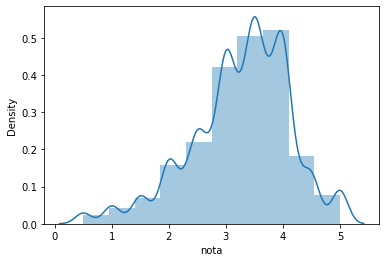

In [20]:
sns.distplot(medias_por_filme, bins=10)

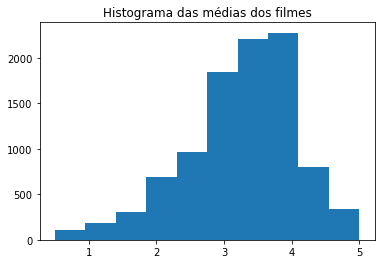

In [21]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')
plt.show()

In [22]:
tmdb = pd.read_csv('dataset/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Variáveis Qualitativas (ou categóricas) -> Variáveis nominais

##### Exemplo:

In [23]:
# Variáveis Qualitativas (ou categóricas) -> Variáveis nominais

tmdb['original_language'].unique() # Categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

### Variáveis Qualitativas (ou categóricas) -> Variáveis ordinais

Existe uma ordenação entre as categorias. Exemplos: escolaridade (1o, 2o, 3o graus), 
estágio da doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro,..., dezembro).
##### Exemplo
Primeiro grau
Segundo grau
Terceiro grau
1 grau < 2 grau < 3 grau



### Variaveis Quantitativas -> Variáveis continuas

características mensuráveis que assumem valores em uma escala contínua (na reta real), 
para as quais valores fracionais fazem sentido. Usualmente devem ser medidas através de 
algum instrumento. Exemplos: peso (balança), altura (régua), tempo (relógio), pressão arterial, idade.
##### Exemplo
budget => Orçamento => quantitativa continuo



### Variaveis Quantitativas -> Variáveis discretas
##### Exemplo
Quantidades de votos => 1, 2, 3, 4, não tem 2.5 votos. 
Notas do movielens => 0.5, 1.0, ..., 4.5, 5.0 não tem 2.7

---
Fonte: http://leg.ufpr.br/~silvia/CE055/node8.html

In [24]:
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
he       3
th       3
cs       2
ta       2
id       2
ar       2
ro       2
af       1
ky       1
is       1
no       1
tr       1
hu       1
pl       1
el       1
vi       1
te       1
xx       1
sl       1
nb       1
ps       1
Name: original_language, dtype: int64

In [25]:
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'nl', 'fa', 'he', 'th', 'cs', 'ta', 'id', 'ar', 'ro', 'af',
       'ky', 'is', 'no', 'tr', 'hu', 'pl', 'el', 'vi', 'te', 'xx', 'sl', 'nb',
       'ps'],
      dtype='object')

In [26]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

In [27]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

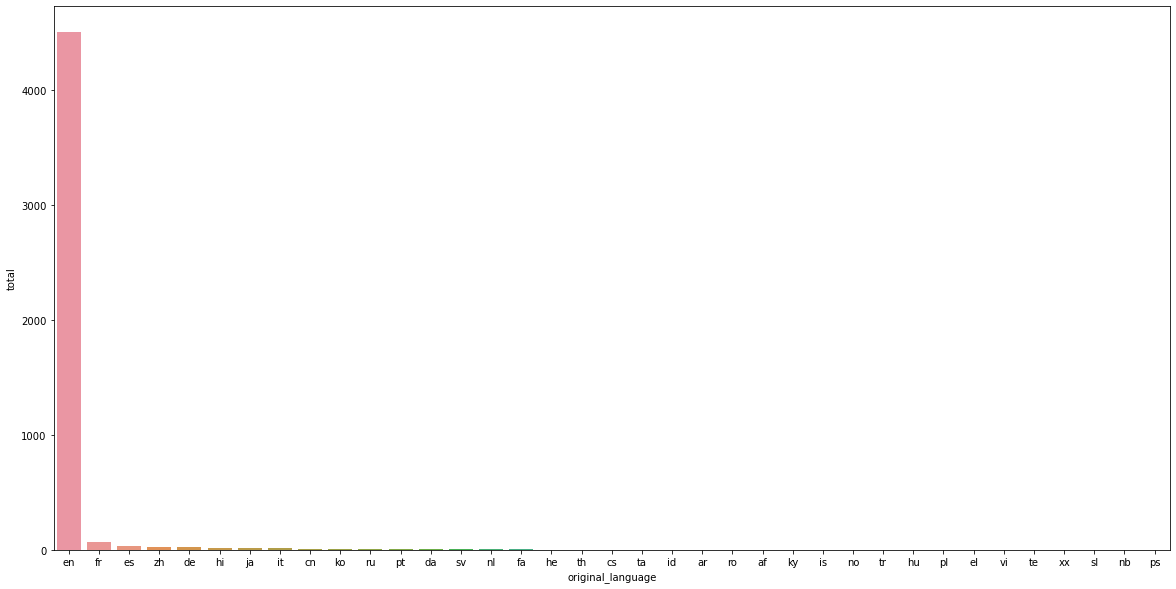

In [28]:
plt.figure(figsize=(20, 10))
sns.barplot(x='original_language', y='total', data=contagem_de_lingua)

<Figure size 1440x720 with 0 Axes>

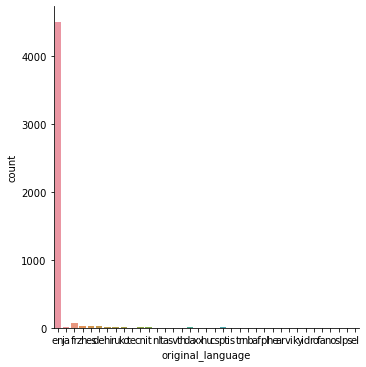

In [29]:
plt.figure(figsize=(20, 10))
sns.catplot(x='original_language', kind='count', data=tmdb)

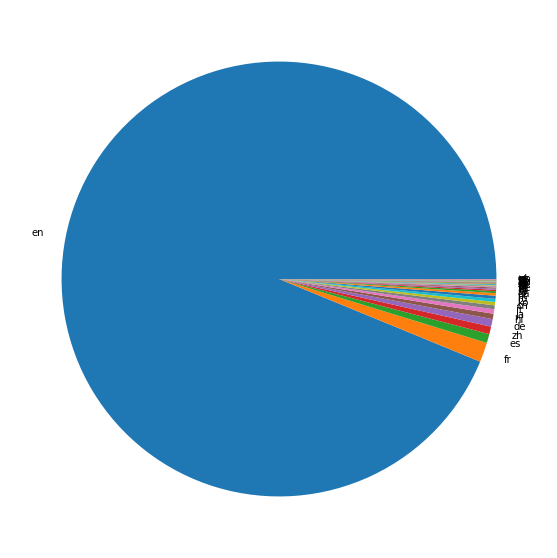

In [30]:
plt.figure(figsize=(15,10))
plt.pie(contagem_de_lingua['total'], labels=contagem_de_lingua['original_language'])
plt.show()

# Péssimo gráfico, muito díficil distinguir as áreas e tem muita informação

In [31]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


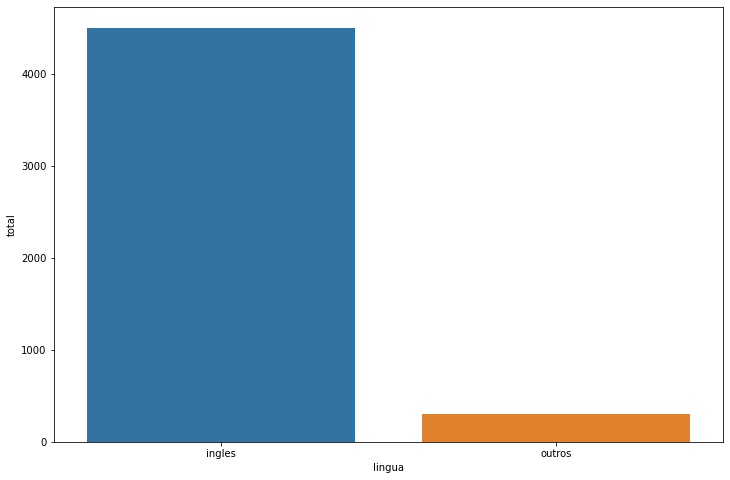

In [32]:
dados = {'lingua': ['ingles', 'outros'], 'total':[total_de_ingles, total_do_resto]}
dados = pd.DataFrame(dados)

plt.figure(figsize=(12, 8))
sns.barplot(x='lingua', y='total', data=dados)
plt.show()

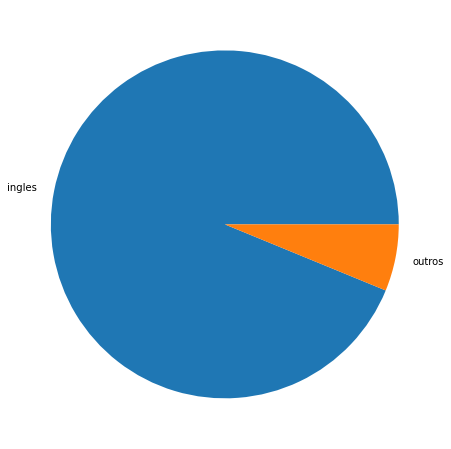

In [33]:
plt.figure(figsize=(10,8))
plt.pie(dados['total'], labels=dados['lingua'])
plt.show()

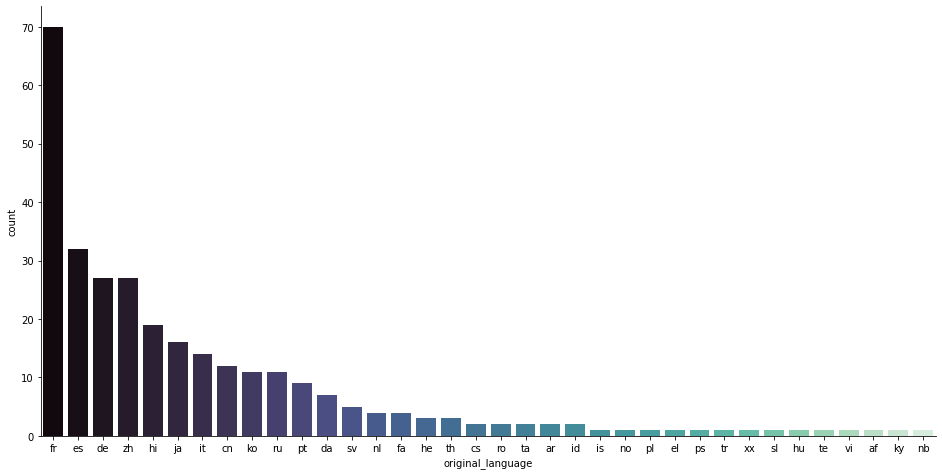

In [34]:
total_por_outras_linguas = tmdb.query("original_language != 'en'")
sns.catplot(x ='original_language', kind='count', data=total_por_outras_linguas, 
            height=6.5, aspect=2, 
            order=tmdb.query("original_language != 'en'")['original_language'].value_counts().index,
            palette='mako')
plt.show()

In [35]:
tmdb.query("original_language != 'en'")['original_language'].value_counts().index

Index(['fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt', 'da',
       'sv', 'nl', 'fa', 'he', 'th', 'cs', 'ro', 'ta', 'ar', 'id', 'is', 'no',
       'pl', 'el', 'ps', 'tr', 'xx', 'sl', 'hu', 'te', 'vi', 'af', 'ky', 'nb'],
      dtype='object')

#### Para saber mais


Com o Seaborn, somos capazes de criar vários tipos de gráficos ou visualizações. Ao longo deste curso, aprendemos a fazer os gráficos de barras (histogramas) e diagrama de caixa (boxplot).

Outro exemplo de gráfico que pode ser criado com essa biblioteca é o gráfico linear:


`import seaborn as sns`
`sns.set(style="ticks")`

#Load the example dataset for Anscombe's quartet
`df = sns.load_dataset("anscombe")`

#Show the results of a linear regression within each dataset
<p>`sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})`

Documentação da biblioteca http://seaborn.pydata.org/examples/

## Dados e estatísticas

In [36]:
filmes.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [37]:
notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [38]:
print(f'Nota média do Toy Story {notas_do_toy_story.nota.mean():.2f}')
print(f'Nota média do Jumanji {notas_do_jumanji.nota.mean():.2f}')

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [39]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5]*10))
filme2 = np.append(np.array([5] * 10), np.array([1]*10))
print(filme1)
print(filme1.mean())

[2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5
 3.5 3.5]
3.0


In [40]:
print('mean: ', filme1.mean(), filme2.mean())
print('median: ',np.median(filme1), np.median(filme2))
print('std: ',np.std(filme1), np.std(filme2))

mean:  3.0 3.0
median:  3.0 3.0
std:  0.5 2.0


C:\Users\guilh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\guilh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


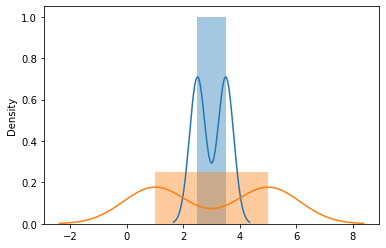

In [41]:
sns.distplot(filme1)
sns.distplot(filme2)
plt.show()

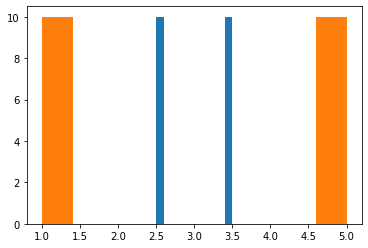

In [42]:
plt.hist(filme1)
plt.hist(filme2)
plt.show()

C:\Users\guilh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

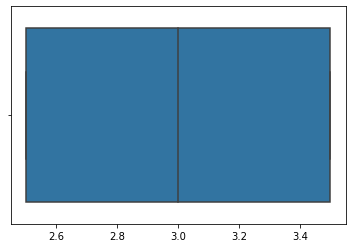

In [43]:
sns.boxplot(filme1)

{'whiskers': [<matplotlib.lines.Line2D at 0x211178f0988>,
 'caps': [<matplotlib.lines.Line2D at 0x211178c8e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x211178bbec8>,
 'medians': [<matplotlib.lines.Line2D at 0x211179050c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x21117905ec8>,
 'means': []}

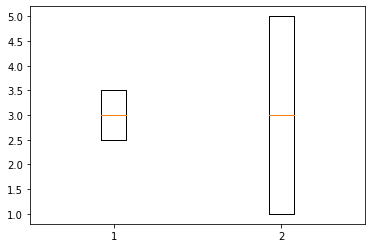

In [44]:
plt.boxplot([filme1, filme2])

C:\Users\guilh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='nota'>

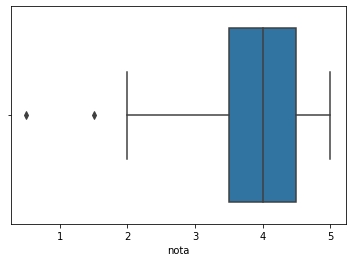

In [45]:
sns.boxplot(notas_do_toy_story.nota)

<AxesSubplot:xlabel='filmeId', ylabel='nota'>

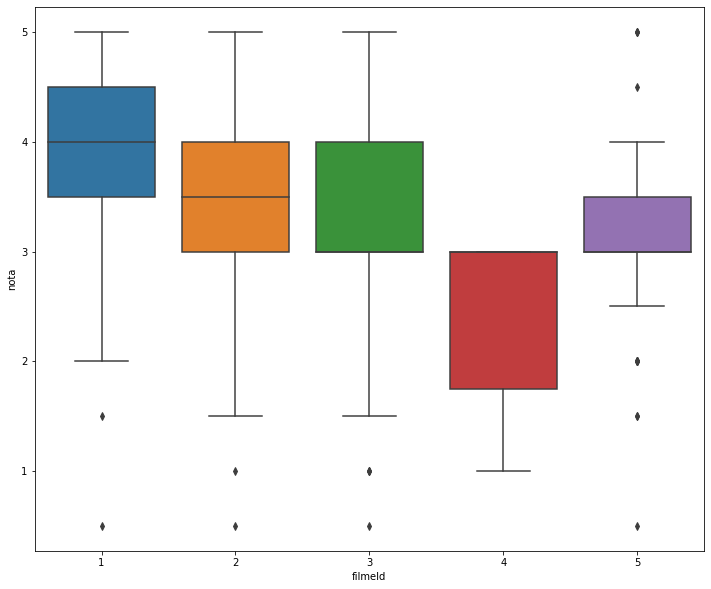

In [46]:
plt.figure(figsize=(12,10))
sns.boxplot(x='filmeId', y='nota', data=notas.query('filmeId in [1,2,3,4,5]'))

In [47]:
print(notas_do_toy_story.nota.std())
print(notas_do_jumanji.nota.std())

0.8348591407114045
0.8817134921476455
